# メディア情報学実験 資料ノート1

## 回帰問題編

解答がわからなかった人，解答の方針が立たない人向けのノートです．

1. 上から順に読んで（重要），
2. セルを実行していってください．
3. 理解できない場合は，TA を呼ぶか，先生に質問を投げるかしてください．
4. 自分の演習ノートのページにコードを真似して貼り付けしてください

In [1]:
# まずは必要そうなものをインポート scipy は要らないかも
import numpy as np
import matplotlib.pylab as plt

直線のモデル y = a x + b を考える．
データは，直線モデルから，ノイズが加えられて観測したとする．
このときのノイズの標準偏差は sgm = 0.2 とする

In [63]:
# ここらへんのパラメータを変えて遊んでみてください

N = 100  #サンプル点の個数
a = 1.2  #モデル直線の傾き
b = 0.5  #モデル直線の切片
sgm = 0.2  # ノイズの標準偏差

x = np.random.rand(N)    # [0, 1) の区間に N 個の乱数発生
ytrue = a * x + b

y = ytrue  + sgm * np.random.randn(N)  # 真値にノイズを乗せて観測データを作る

### これで下準備完了

一応，解説を入れておくと

* `x`: データのx座標（乱数で生成） 
* `ytrue`: a x + b 上の値 
* `y`: `ytrue` にガウスノイズを載せたもの 

です．
なので，(x, y) にデータが入っていると思いましょうという話です．
そこで，これらの点のプロットと真の直線の関係を見てみることにします．

(0.4, 1.8)

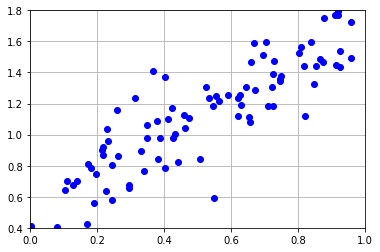

In [64]:
# 散布図の描画
plt.figure()
plt.plot(x, y, 'bo', label='data')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0.4, 1.8)

このような青点の散布図が与えられたときに

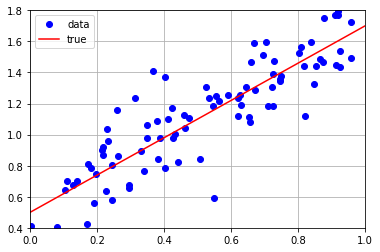

In [65]:
# 真の関係を描画
plt.figure()
plt.plot(x, y, 'bo', label='data')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0.4, 1.8)
xx = np.linspace(0, 1, 128)
yy = a * xx + b
plt.plot(xx, yy, 'r-', label='true')
plt.legend()

上図のような赤線を得ることができるのか？というのが問いかけになります．
少しかっこいい言葉遣いをすれば

## 問い: データ点（青い点）のみから，もとになる直線（赤直線）を推定することは可能か？

になります．これには解法としていくつか考えられますが，ここでは以下のような機械学習と呼ばれる手法に頼ることとします．

データの点群を $\{(x_n, y_n)\}$ とし， 推定モデルを $f(x; w) = w_1 x + w_0$ とおいて， $w_0$ と $w_1$ を推定することを考える．
この問題は *最小二乗法* の問題で，　以下の関数（ロス関数と呼ばれる）
$$
    J(w) = \frac{1}{N} \sum_n (y_n - f(x_n))^2
$$
を，最小化する　$w$ を求めることを考える． 

## 要はモデル $f(x_n)$ と，　観測点 $y_n$ の差（残差）が小さくなる $w$ を求める．


この問題は，正規方程式
$$
    \left(\begin{array}{rr} N & \sum x_n \\ \sum x_n  & \sum x_n^2 \end{array}\right) 
    \left(\begin{array}{r} w_0 \\ w_1 \end{array}\right)
    =
     \left(\begin{array}{r} \sum y_n \\ \sum x_n y_n \end{array}\right)
$$
を解けばよい（導出が知りたければ質問すること）．
解は，
$$
    \left(\begin{array}{r} w_0 \\ w_1 \end{array}\right)
    =
    \frac{1}{N \sum x_n^2 - (\sum x_n)^2}
    \left(\begin{array}{rr} \sum x_n^2  & - \sum x_n \\ - \sum x_n  & N\end{array}\right)
     \left(\begin{array}{r} \sum y_n \\ \sum x_n y_n \end{array}\right)
$$

In [54]:
# 最小二乗法から解をもとめよ

#とりあえず統計量を計算しておく（上式の和記号が付いたやつ）
xsum = x.sum()
x2sum = (x**2).sum()
ysum = y.sum()
xysum = x @ y

# 2x2 の逆行列は手計算で解ける
det = N * x2sum - (xsum)**2
w0 = (x2sum * ysum - xsum * xysum) / det
w1 = (-xsum * ysum + N * xysum) / det

print("Estimate w1, w0 = (%.3f, %.3f)" % (w1, w0))
print("True      a,  b = (%.3f, %.3f)" % (a, b))

Estimate w1, w0 = (1.212, 0.487)
True      a,  b = (1.200, 0.500)


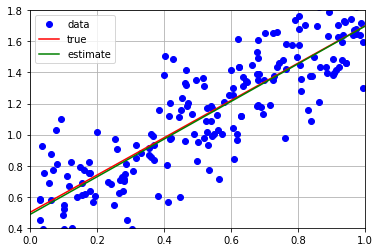

In [55]:
# 得られた直線が正しそうか　プロット してみよう

plt.plot(x, y, 'bo', label='data')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0.4, 1.8)

xx = np.linspace(0, 1, 128)
yy = a * xx + b
plt.plot(xx, yy, 'r-', label='true')
yy = w1 * xx + w0
plt.plot(xx, yy, 'g-', label='estimate')
plt.legend() # 凡例を描画

緑のラインが推定で，赤のラインが真値．

ついでに，残差とロス関数値も評価しておこう．　残差は モデル $f(x) = w_1 x + w_0$ が吐き出す予測値と $y$ の差の総和

In [56]:
# 残差を表示せよ

residual = np.sum((y - (w1 * x + w0))**2)
print( "Residual: %.3f" % (residual))
print( "Mean squared error %.3f" % (residual/N))   #1点あたりのズレ（平均二乗誤差）

Residual: 7.954
Mean squared error 0.040


## うんだいたい良さげ

でも，正規方程式とか面倒だよね．．．で，この演習では python のパッケージを使った機械学習手法を習得しましょうという話になります．
紹介コードとしては，以下の２種を提供します．

1. scikit-learn を使う
2. Keras + Tensor 使う

このレベルの問題であれば１を使うのが楽だけど，，後半の画像認識では，選択肢２がメインになるので，一応両方とも解法を記載する

## Scikit learn (sklearn) を使った解答

scikit-learn は機械学習のパッケージを万人がなるべく使いやすいようにという目的で作られたパッケージです．
このパッケージを用いた場合，やらなければいけないことは，

1.  適切なモデルの `import`
2. モデルのパラメータを適合させる `fit`

になります．この場合モデルとしては線形モデルを導入すればよいので，`linear_model` をいんぽーとします．
また，ロス関数は二乗誤差の形になるので `mean_squared_error` (平均二乗誤差）を距離尺度としてインポートします．

そのうえで，線形回帰モデル（`LinearRegression`）を用いれば，用途としては十分となります．
このような形でモデルを構築して，あとは細かい計算（上の正規方程式みたいなもの）はお任せで，モデルの `fit` メソッドを呼び出すことで適合させることができます．

In [8]:
# sklearn を使った解答

from sklearn import linear_model   # 線形モデル導入
from sklearn.metrics import mean_squared_error  # 平均二乗誤差

# モデルは，回帰(regression) なので regr というオブジェクトとして扱う
regr = linear_model.LinearRegression()

#線形回帰モデル(Linear Regression()) が期待しているデータ形式は，各行にデータが入っているものなので reshape して渡す
regr.fit(x.reshape(N, 1), y.reshape(N,1))

ModuleNotFoundError: No module named 'sklearn'

フィットさせることに成功した場合，なにもえらーは吐き出しません．
モデルを定義して, モデル内の fit() 関数を呼び出すだけでOKですが，知りたいのはモデルのパラメータなどです．
fit したあとは， モデル内の coef_ と intercept_ を見ればそこに解が入っています．

In [ ]:
print("w0, w1 = (%.3f, %.3f)" % (regr.coef_, regr.intercept_))

OK,あってるぽい

さらに詳しい使い方を知りたければ， scikit-learn の web ページを読むと良いです（サンプルコードもいっぱいある，英語だけど）

## Keras + TensorFlow を用いた解法

TensorFlow は，　Google が開発した深層学習要の枠組み（フレームワーク）である．
これだけでも使えるけど，　ややマニアックな嫌いがあるので， それを噛み砕いたインターフェースが Keras だと
おもってもらってよい（誤解をおそれずにいえばです．）

深層学習用のパッケージなので，普通は，
### こんな単純な回帰問題には *使いません* ．
が，使えないわけではありません．また，後半との連結をよくするために雰囲気で書いています．
（まじめに線形回帰するだけならscikit-learnのほうがうまく動きます）

Tensorflow + Keras でも

1. 必要なオブジェクトのインポート
2. モデルの構築
3. fit

という手順の流れは同等です．



In [57]:
# Keras を用いて実現する
# インポートは，モデル構築のための枠組み
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

回帰モデルは　$f(x; w) = w_1 x + w_0$ となり，パラメータは $w_1$ と $w_0$ な形で表されます．
これを計算グラフと呼ばれる表現（ニューラルネットワーク表現）であらわすと，入力 $x$ に対して
重み $w_1$ をかけ，バイアスとして $w_0$ を足したものを出力とするユニットを造ればよいということになります．

モデルを構築するための枠組みとしては，入力を変換して別形式にする `Sequential` モデルを使います．
この `Sequential` モデルの上に，入力が一つでバイアスありのモデルを `add` することでモデルを構築します．

さらにこのモデルにたいして，どのようなロス関数を用いて最適化を行うかを指定します．

In [58]:
model = Sequential()   # 階層型のモデルを選択
model.add(Dense(1, input_shape=(1,), use_bias=True)) # 素子が一個の改装モデル

# model.summary() # モデルの概要をアウトプット (確認は重要)

model.compile(loss='mean_squared_error',  optimizer='sgd') #最適化手法を指定

モデルができたら，あとは `fit` するという手続きを踏むだけです．

In [59]:
# 学習によるパラメータフィット
hist = model.fit(x, y, epochs=512, batch_size=50, verbose=1)

Epoch 1/512
4/4 [==============================] - 0s 2ms/step - loss: 3.9371
Epoch 2/512
4/4 [==============================] - 0s 3ms/step - loss: 3.2512
Epoch 3/512
4/4 [==============================] - 0s 4ms/step - loss: 2.6955
Epoch 4/512
4/4 [==============================] - 0s 3ms/step - loss: 2.2439
Epoch 5/512
4/4 [==============================] - 0s 6ms/step - loss: 1.8776
Epoch 6/512
4/4 [==============================] - 0s 5ms/step - loss: 1.5790
Epoch 7/512
4/4 [==============================] - 0s 3ms/step - loss: 1.3365
Epoch 8/512
4/4 [==============================] - 0s 2ms/step - loss: 1.1398
Epoch 9/512
4/4 [==============================] - 0s 2ms/step - loss: 0.9799
Epoch 10/512
4/4 [==============================] - 0s 2ms/step - loss: 0.8491
Epoch 11/512
4/4 [==============================] - 0s 4ms/step - loss: 0.7428
Epoch 12/512
4/4 [==============================] - 0s 7ms/step - loss: 0.6568
Epoch 13/512
4/4 [==============================] - 0s 2ms/st

4/4 [==============================] - 0s 2ms/step - loss: 0.1389
Epoch 105/512
4/4 [==============================] - 0s 2ms/step - loss: 0.1379
Epoch 106/512
4/4 [==============================] - 0s 4ms/step - loss: 0.1368
Epoch 107/512
4/4 [==============================] - 0s 3ms/step - loss: 0.1358
Epoch 108/512
4/4 [==============================] - 0s 3ms/step - loss: 0.1348
Epoch 109/512
4/4 [==============================] - 0s 3ms/step - loss: 0.1339
Epoch 110/512
4/4 [==============================] - 0s 3ms/step - loss: 0.1329
Epoch 111/512
4/4 [==============================] - 0s 2ms/step - loss: 0.1319
Epoch 112/512
4/4 [==============================] - 0s 2ms/step - loss: 0.1310
Epoch 113/512
4/4 [==============================] - 0s 2ms/step - loss: 0.1300
Epoch 114/512
4/4 [==============================] - 0s 2ms/step - loss: 0.1292
Epoch 115/512
4/4 [==============================] - 0s 3ms/step - loss: 0.1282
Epoch 116/512
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 0.0743
Epoch 207/512
4/4 [==============================] - 0s 2ms/step - loss: 0.0740
Epoch 208/512
4/4 [==============================] - 0s 2ms/step - loss: 0.0736
Epoch 209/512
4/4 [==============================] - 0s 3ms/step - loss: 0.0733
Epoch 210/512
4/4 [==============================] - 0s 3ms/step - loss: 0.0729
Epoch 211/512
4/4 [==============================] - 0s 4ms/step - loss: 0.0726
Epoch 212/512
4/4 [==============================] - 0s 3ms/step - loss: 0.0723
Epoch 213/512
4/4 [==============================] - 0s 3ms/step - loss: 0.0719
Epoch 214/512
4/4 [==============================] - 0s 3ms/step - loss: 0.0716
Epoch 215/512
4/4 [==============================] - 0s 3ms/step - loss: 0.0713
Epoch 216/512
4/4 [==============================] - 0s 3ms/step - loss: 0.0709
Epoch 217/512
4/4 [==============================] - 0s 3ms/step - loss: 0.0706
Epoch 218/512
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 0.0518
Epoch 309/512
4/4 [==============================] - 0s 3ms/step - loss: 0.0517
Epoch 310/512
4/4 [==============================] - 0s 2ms/step - loss: 0.0516
Epoch 311/512
4/4 [==============================] - 0s 3ms/step - loss: 0.0515
Epoch 312/512
4/4 [==============================] - 0s 3ms/step - loss: 0.0513
Epoch 313/512
4/4 [==============================] - 0s 2ms/step - loss: 0.0512
Epoch 314/512
4/4 [==============================] - 0s 2ms/step - loss: 0.0511
Epoch 315/512
4/4 [==============================] - 0s 2ms/step - loss: 0.0510
Epoch 316/512
4/4 [==============================] - 0s 2ms/step - loss: 0.0509
Epoch 317/512
4/4 [==============================] - 0s 2ms/step - loss: 0.0508
Epoch 318/512
4/4 [==============================] - 0s 2ms/step - loss: 0.0507
Epoch 319/512
4/4 [==============================] - 0s 2ms/step - loss: 0.0505
Epoch 320/512
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 0.0440
Epoch 411/512
4/4 [==============================] - 0s 4ms/step - loss: 0.0439
Epoch 412/512
4/4 [==============================] - 0s 3ms/step - loss: 0.0439
Epoch 413/512
4/4 [==============================] - 0s 2ms/step - loss: 0.0439
Epoch 414/512
4/4 [==============================] - 0s 3ms/step - loss: 0.0438
Epoch 415/512
4/4 [==============================] - 0s 5ms/step - loss: 0.0438
Epoch 416/512
4/4 [==============================] - 0s 3ms/step - loss: 0.0437
Epoch 417/512
4/4 [==============================] - 0s 2ms/step - loss: 0.0437
Epoch 418/512
4/4 [==============================] - 0s 3ms/step - loss: 0.0436
Epoch 419/512
4/4 [==============================] - 0s 3ms/step - loss: 0.0436
Epoch 420/512
4/4 [==============================] - 0s 2ms/step - loss: 0.0436
Epoch 421/512
4/4 [==============================] - 0s 4ms/step - loss: 0.0435
Epoch 422/512
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 0.0412


うまくロス関数が小さくなっているかを確認する．
ロス関数の学習時の値は `fit` が返してくるオブジェクトの `history['loss']` という要素に入っているのでそれを表示させてみる．

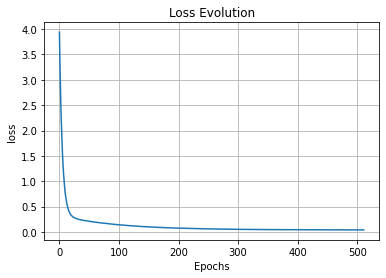

In [60]:
# ロスの値が学習によってどう変わっていくのかを表示してみる

plt.plot(hist.history['loss'])
#plt.semilogy(hist.history['loss']) #対数スケールの方が収束したかは判断しやすい
plt.title('Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()

かなり頑張って前出のロス値付近に収束しているぽい．
なので，　パラメータを取り出して確認してみる

In [61]:
w1, w0 = model.get_weights()
print( "w0, w1 = (%.3f, %.3f)" % (w0, w1))

w0, w1 = (0.560, 1.080)


推定直線とデータ，真の直線を重ねて見る

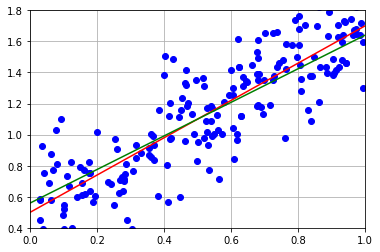

In [62]:
#w0 と w1 は，　np.array なので，使いやすいように float 型へ変換しておく
w0 = float(w0)
w1 = float(w1)

# あとはプロット
plt.plot(x, y, 'bo')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0.4, 1.8)

xx = np.linspace(0, 1, 128)
yy = a * xx + b
plt.plot(xx, yy, 'r-')
yy = w1 * xx + w0
plt.plot(xx, yy, 'g-')

多分，前述の解とは微妙にずれているが，そんなに致命的ではないのを確認してください.

### 逆説的に言えば，機械学習による推定とは，そのくらいの誤差が含まれるものと認識してください．